# Imports

In [1]:
import sys
sys.path.append('../src')

from data_manager import (
    read_frame, 
    annotations_for_frame,
    show_annotation,
    bounding_boxes_to_mask
)
from feature_manager import feature_extraction

import os
import pickle
import random 

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd

from tqdm import tqdm 

from skimage import io, transform

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

data_path = '../data'

train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')

# Dataset for vehicle recognition

In [9]:
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))

print(f"Training data {len(train_df)}")
train_df.head(2)

Training data 2020


,frame_id,bounding_boxes
0,train/A_001.jpg,0 225 214 317 0 172 345 254 285 240 155 131 70...
1,train/A_002.jpg,0 254 190 293 0 169 338 271 276 238 160 137 70...


# Read frame

Frame shape: 720, 1280, 3


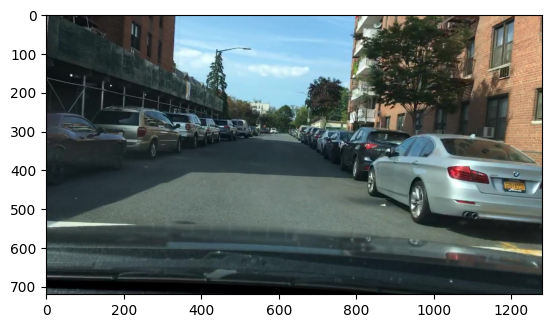

In [3]:
frame = read_frame(data_path, train_df, 58)

H, W, C = frame.shape
print(f"Frame shape: {H}, {W}, {C}")

plt.imshow(frame)
plt.show()

# Frame rectangles

In [4]:
annotations_for_frame(train_df, 58)

[array([828, 305, 450, 238]),
 array([755, 289, 187, 140]),
 array([716, 298,  80,  88]),
 array([694, 297,  50,  68]),
 array([679, 296,  45,  54]),
 array([665, 292,  49,  44]),
 array([657, 289,  39,  42]),
 array([625, 283,  59,  40]),
 array([578, 292,  18,  17]),
 array([564, 290,  22,  18]),
 array([427, 269,  67,  58]),
 array([474, 269,  51,  51]),
 array([522, 287,  11,  29]),
 array([527, 288,  21,  25]),
 array([550, 292,  20,  17]),
 array([115, 235, 238, 139]),
 array([300, 251, 117,  93]),
 array([395, 266,  56,  67]),
 array([  0, 254, 207, 188])]

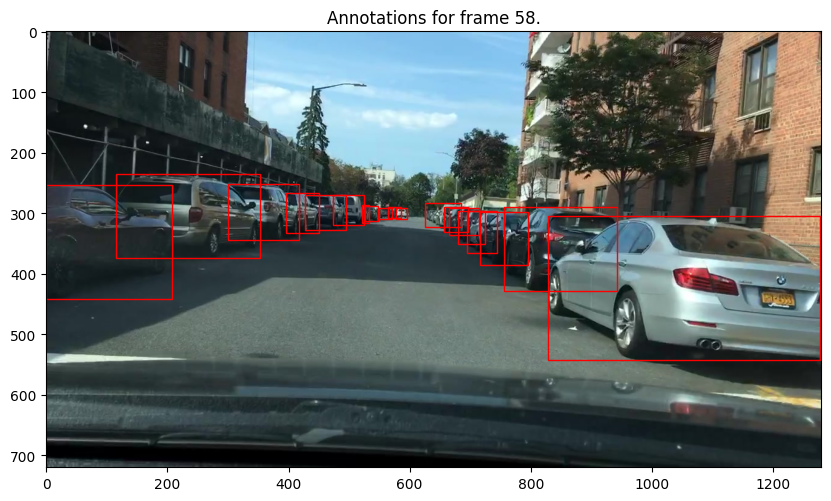

In [5]:
show_annotation(data_path, train_df, 58)

# Mask

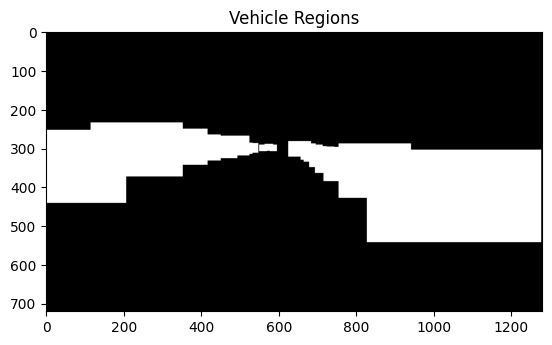

In [7]:
vehicle_rectangles = annotations_for_frame(train_df, 58)
vehicle_mask = bounding_boxes_to_mask(vehicle_rectangles, 720, 1280)

plt.imshow(vehicle_mask, cmap='gray')
plt.title('Vehicle Regions')
plt.show()